<a href="https://colab.research.google.com/github/ShaswataRoy/DataMine/blob/main/mRNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
%%writefile mRNA.py
import numpy as np
import pandas as pd
import stan
import matplotlib.pyplot as plt

df = pd.read_csv('mRNA.csv', comment='#')

x1 = df['x1'].to_numpy()

x1 = x1[:10000] #Reduced the data to ensure convergence in reasonable time
model_code = """
data {
  // Number of separate experiments
  int K;
  
  real x[K];
}


parameters {
  // Hyperparameters
  

  // Parameters
  real<lower=0> k_plus;
  real<lower=0> k_minus;
}


transformed parameters {
  // Transformed hyperparameters
  real<lower=0> theta[K];
 
  for (i in 1:K){
    theta[i] = x[i]/5;
}
}


model {
  // Hyperpriors
  //phi ~ beta(2.0, 2.0);
  k_plus ~ normal(2,2);
  k_minus ~ normal(2,2);
  
  // Prior
  theta ~ beta(k_plus,k_minus);
  
}
"""

data = {"x": x1,"K": len(x1)}

posterior = stan.build(model_code, data=data, random_seed=1)
fit = posterior.sample(num_chains=4, num_samples=1000)
df = fit.to_frame()
df.to_csv('traces.csv')

Overwriting mRNA.py


In [ ]:
!python mRNA.py

Building: found in cache, done.
Sampling:   0%
Sampling:   0% (1/8000)
Sampling:   0% (2/8000)
Sampling:   1% (101/8000)
Sampling:   2% (200/8000)
Sampling:   4% (300/8000)
Sampling:   5% (400/8000)
Sampling:   6% (500/8000)
Sampling:   8% (600/8000)
Sampling:   9% (700/8000)
Sampling:  10% (800/8000)
Sampling:  11% (900/8000)
Sampling:  12% (1000/8000)
Sampling:  14% (1100/8000)
Sampling:  15% (1200/8000)
Sampling:  16% (1300/8000)
Sampling:  18% (1400/8000)
Sampling:  19% (1500/8000)
Sampling:  20% (1600/8000)
Sampling:  21% (1700/8000)
Sampling:  22% (1800/8000)
Sampling:  25% (2000/8000)
Sampling:  32% (2600/8000)
Sampling:  34% (2700/8000)
Sampling:  39% (3100/8000)
Sampling:  40% (3200/8000)
Sampling:  41% (3300/8000)
Sampling:  41% (3301/8000)
Sampling:  43% (3401/8000)
Sampling:  44% (3500/8000)
Sampling:  45% (3600/8000)
Sampling:  46% (3700/8000)
Sampling:  48% (3800/8000)
Sampling:  49% (3900/8000)
Sampling:  50% (4000/8000)
Sampling:  51% (4100/8000)
Sampling:  52% (4200/80

In [29]:
!rm -rf build

In [15]:
import pandas as pd
df = pd.read_csv('traces.csv')

In [24]:
import seaborn as sns


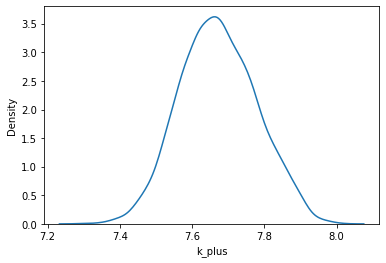

In [25]:
sns.kdeplot(data = df,x='k_plus')